In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [5]:
df = pd.read_csv('./data/universe_code.csv')
df.head()

,종목명,현재가,대비,대비(%),거래량,L(일봉)H,종목코드,거래량 (G),거래대금(만원) (H),매출액 영업이익률(%) (L),결산기준 (L),매출액 순이익률(%) (M),결산기준 (M),매출액(백만원) (A1),결산기준 (A1),매출액(백만원) (B1),결산기준 (B1),매출액(백만원) (C1),결산기준 (C1)
0,DL,"78,300","-2,000",-2.49,"341,200",-2.49,A000210,"341,200","2,665,082",11.65,Dec-19,7.32,Dec-19,"9,700,078",Dec-19,"10,984,485",Dec-18,"12,335,536",Dec-17
1,유유제약,"12,400",-250,-1.98,"33,195",-1.98,A000220,"33,195","41,476",8.89,Dec-19,6.12,Dec-19,"90,877",Dec-19,"83,096",Dec-18,"62,852",Dec-17
2,한국앤컴퍼니,"17,000",-300,-1.73,"350,644",-1.73,A000240,"350,644","590,353",20.16,Dec-19,19.26,Dec-19,"847,609",Dec-19,"847,957",Dec-18,"824,846",Dec-17
3,삼천당제약,"55,800","-3,200",-5.42,"821,467",-5.42,A000250,"821,467","4,551,879",13.51,Dec-19,10.50,Dec-19,"186,602",Dec-19,"159,960",Dec-18,"160,587",Dec-17
4,SK하이닉스,"140,000","-2,000",-1.41,"6,091,444",-1.41,A000660,"6,091,444","84,427,125",10.05,Dec-19,7.47,Dec-19,"26,990,733",Dec-19,"40,445,066",Dec-18,"30,109,434",Dec-17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   종목명               508 non-null    object 
 1   현재가               508 non-null    object 
 2   대비                483 non-null    object 
 3   대비(%)             508 non-null    float64
 4   거래량               508 non-null    object 
 5   L(일봉)H            508 non-null    float64
 6   종목코드              508 non-null    object 
 7   거래량 (G)           508 non-null    object 
 8   거래대금(만원) (H)      508 non-null    object 
 9   매출액 영업이익률(%) (L)  508 non-null    float64
 10  결산기준 (L)          508 non-null    object 
 11  매출액 순이익률(%) (M)   508 non-null    float64
 12  결산기준 (M)          508 non-null    object 
 13  매출액(백만원) (A1)     508 non-null    object 
 14  결산기준 (A1)         508 non-null    object 
 15  매출액(백만원) (B1)     508 non-null    object 
 16  결산기준 (B1)         508 non-null    object 
 1

In [12]:
codes = df.종목코드.apply(lambda x: x[1:]).values
codes

array(['000210', '000220', '000240', '000250', '000660', '000990',
       '001340', '001390', '001500', '001750', '001800', '001820',
       '001880', '002310', '002350', '002390', '002870', '003090',
       '003220', '003410', '003530', '003550', '003670', '003780',
       '003850', '004000', '004170', '004490', '004590', '005290',
       '005670', '005690', '005880', '005930', '006060', '006220',
       '006390', '006400', '006620', '006650', '006740', '007330',
       '007340', '007570', '007700', '008490', '009150', '009420',
       '009780', '009970', '010050', '010130', '010240', '010640',
       '010780', '011040', '011170', '011330', '011780', '012330',
       '012510', '012630', '012700', '012750', '012790', '013030',
       '013120', '013810', '013890', '014570', '014680', '014830',
       '015230', '015710', '016090', '016360', '016580', '016600',
       '016610', '017040', '017510', '017890', '017960', '018250',
       '018260', '018310', '019550', '020000', '020150', '0207

In [13]:
res = requests.get('https://finance.naver.com/item/coinfo.naver?code=005930')
soup = BeautifulSoup(res.text, 'html.parser')
soup

<!--  global include -->
<html lang="ko">
<head>
<title>삼성전자 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 금융" property="og:title">
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image">
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220119143956/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220119143956/css/newsto

In [15]:
soup.select('#faaFVlanREZS > table > tbody > tr')

[]

In [16]:
soup.select('#faaFVlanREZS')

[]

In [18]:
driver  =webdriver.Chrome()
driver.get('https://finance.naver.com/item/coinfo.naver?code=005930')
driver.find_element_by_id('cns_Tab22').click()
time.sleep(1)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13188/409809686.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="cns_Tab22"]"}
  (Session info: chrome=97.0.4692.99)
Stacktrace:
Backtrace:
	Ordinal0 [0x004DFDC3+2555331]
	Ordinal0 [0x004777F1+2127857]
	Ordinal0 [0x00372E08+1060360]
	Ordinal0 [0x0039E49E+1238174]
	Ordinal0 [0x0039E69B+1238683]
	Ordinal0 [0x003C9252+1413714]
	Ordinal0 [0x003B7B54+1342292]
	Ordinal0 [0x003C75FA+1406458]
	Ordinal0 [0x003B7976+1341814]
	Ordinal0 [0x003936B6+1193654]
	Ordinal0 [0x00394546+1197382]
	GetHandleVerifier [0x00679622+1619522]
	GetHandleVerifier [0x0072882C+2336844]
	GetHandleVerifier [0x005723E1+541697]
	GetHandleVerifier [0x00571443+537699]
	Ordinal0 [0x0047D18E+2150798]
	Ordinal0 [0x00481518+2168088]
	Ordinal0 [0x00481660+2168416]
	Ordinal0 [0x0048B330+2208560]
	BaseThreadInitThunk [0x7573FA29+25]
	RtlGetAppContainerNamedObjectPath [0x776A7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x776A7A6E+238]


In [ ]:
# iframe src

url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cn=&cmp_cd=000220&menuType=block'

res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [23]:
soup.select('#faaFVlanREZS')

[]

In [ ]:
# 1. iframe src => url
# 2. selenium => page source

In [65]:
driver  =webdriver.Chrome()
driver.get(url)
driver.find_element_by_id('cns_Tab22').click()  # 분기 tab click()
time.sleep(1)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13188/2101117259.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


In [66]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [67]:
soup.select('#QmZIZ20rMn > table:nth-child(2) > tbody > tr:nth-child(8) > td:nth-child(2) > span')

[<span class="cBk">1,500</span>]

In [68]:
soup.select('#QmZIZ20rMn > table:nth-child(2) > tbody > tr:nth-child(11) > td:nth-child(6) > span')

[<span class="cBk">1,278</span>]

In [96]:
tables = pd.read_html(html, encoding='utf-8')

In [97]:
len(tables)

18

In [98]:
fin_df = tables[12]

In [99]:
fin_df = fin_df.T.iloc[:6]  # 예측치 데이터 삭제
fin_df.columns = fin_df.iloc[0]  # 첫 번째 row 칼럼으로
fin_df.drop('주요재무정보', inplace=True)  # 첫번째 row 삭제
fin_df

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


('주요재무정보', '주요재무정보')    매출액  영업이익 영업이익(발표기준) 세전계속사업이익 당기순이익 당기순이익(지배)  \
분기 2020/09  (IFRS연결)  255.0  15.0       15.0     10.0  10.0       7.0   
   2020/12  (IFRS연결)  247.0   1.0        1.0     -5.0  -4.0      -5.0   
   2021/03  (IFRS연결)  265.0   5.0        5.0      7.0   5.0       3.0   
   2021/06  (IFRS연결)  282.0   5.0        5.0      3.0   3.0      -2.0   
   2021/09  (IFRS연결)  298.0   6.0        6.0     -3.0  -2.0      -6.0   

('주요재무정보', '주요재무정보') 당기순이익(비지배)    자산총계   부채총계    자본총계  ...   부채비율   자본유보율  \
분기 2020/09  (IFRS연결)        3.0  1500.0  490.0  1010.0  ...  48.55  992.19   
   2020/12  (IFRS연결)        1.0  1549.0  379.0  1170.0  ...  32.35  982.34   
   2021/03  (IFRS연결)        3.0  1601.0  445.0  1157.0  ...  38.43  460.58   
   2021/06  (IFRS연결)        5.0  1924.0  630.0  1295.0  ...  48.65  492.85   
   2021/09  (IFRS연결)        4.0  1956.0  635.0  1321.0  ...   48.1  489.61   

('주요재무정보', '주요재무정보') EPS(원)  PER(배)  BPS(원) PBR(배) 현금DPS(원) 현금배당수익률 현금배당성향(%)  \
분기 2020/09  (IFRS연결)   43.0   39.95  6216.0   1.34      0.0     NaN       0.0   
   2020/12  (IFRS연결)  -29.0   92.32  6532.0   1.16    109.0     NaN   -372.64   
   2021/03  (IFRS연결)   15.0     NaN  6438.0   1.41      0.0     NaN       0.0   
   2021/06  (IFRS연결)   -8.0  555.71  6698.0   1.46      0.0     NaN       0.0   
   2021/09  (IFRS연결)  -30.0     NaN  6642.0   1.22      0.0     NaN       0.0   

('주요재무정보', '주요재무정보')  발행주식수(보통주)  
분기 2020/09  (IFRS연결)  13763470.0  
   2020/12  (IFRS연결)  15493945.0  
   2021/03  (IFRS연결)  15493945.0  
   2021/06  (IFRS연결)  16735664.0  
   2021/09  (IFRS연결)  17232351.0  

[5 rows x 33 columns]

In [101]:
fin_df.reset_index(inplace=True)  # index를 초기화

In [ ]:
fin_df.drop('level_0', axis=1, inplace=True)  # 첫 번째 칼럼 삭제

In [106]:
fin_df.index = fin_df.level_1.apply(lambda x: x.split()[0])  # 날짜 데이터만 뽑아서 인덱스로
fin_df

"(주요재무정보, 주요재무정보)",level_1,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
level_1,,,,,,,,,,,,,,,,,,,,,
2020/09,2020/09 (IFRS연결),255.0,15.0,15.0,10.0,10.0,7.0,3.0,1500.0,490.0,...,48.55,992.19,43.0,39.95,6216.0,1.34,0.0,NaN,0.0,13763470.0
2020/12,2020/12 (IFRS연결),247.0,1.0,1.0,-5.0,-4.0,-5.0,1.0,1549.0,379.0,...,32.35,982.34,-29.0,92.32,6532.0,1.16,109.0,NaN,-372.64,15493945.0
2021/03,2021/03 (IFRS연결),265.0,5.0,5.0,7.0,5.0,3.0,3.0,1601.0,445.0,...,38.43,460.58,15.0,NaN,6438.0,1.41,0.0,NaN,0.0,15493945.0
2021/06,2021/06 (IFRS연결),282.0,5.0,5.0,3.0,3.0,-2.0,5.0,1924.0,630.0,...,48.65,492.85,-8.0,555.71,6698.0,1.46,0.0,NaN,0.0,16735664.0
2021/09,2021/09 (IFRS연결),298.0,6.0,6.0,-3.0,-2.0,-6.0,4.0,1956.0,635.0,...,48.1,489.61,-30.0,NaN,6642.0,1.22,0.0,NaN,0.0,17232351.0


In [107]:
fin_df.drop('level_1', axis=1, inplace=True)
# fin_df.to_csv('')

"(주요재무정보, 주요재무정보)",매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
level_1,,,,,,,,,,,,,,,,,,,,,
2020/09,255.0,15.0,15.0,10.0,10.0,7.0,3.0,1500.0,490.0,1010.0,...,48.55,992.19,43.0,39.95,6216.0,1.34,0.0,NaN,0.0,13763470.0
2020/12,247.0,1.0,1.0,-5.0,-4.0,-5.0,1.0,1549.0,379.0,1170.0,...,32.35,982.34,-29.0,92.32,6532.0,1.16,109.0,NaN,-372.64,15493945.0
2021/03,265.0,5.0,5.0,7.0,5.0,3.0,3.0,1601.0,445.0,1157.0,...,38.43,460.58,15.0,NaN,6438.0,1.41,0.0,NaN,0.0,15493945.0
2021/06,282.0,5.0,5.0,3.0,3.0,-2.0,5.0,1924.0,630.0,1295.0,...,48.65,492.85,-8.0,555.71,6698.0,1.46,0.0,NaN,0.0,16735664.0
2021/09,298.0,6.0,6.0,-3.0,-2.0,-6.0,4.0,1956.0,635.0,1321.0,...,48.1,489.61,-30.0,NaN,6642.0,1.22,0.0,NaN,0.0,17232351.0


In [111]:
fin_df = fin_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','ROE(%)', 'ROA(%)',\
        'EPS(원)', 'PER(배)','BPS(원)', 'PBR(배)']]  # 사용할 칼럼값만 추출..

In [120]:
fin_df.

"(주요재무정보, 주요재무정보)",매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,ROE(%),ROA(%),EPS(원),PER(배),BPS(원),PBR(배)
level_1,,,,,,,,,,,,
2020/09,295.0,43.0,36.0,1850.0,306.0,1544.0,5.65,4.82,267.0,34.25,11106.0,1.89
2020/12,298.0,30.0,20.0,1851.0,295.0,1556.0,5.98,5.01,129.0,32.19,11172.0,1.88
2021/03,308.0,32.0,29.0,1870.0,306.0,1564.0,6.48,5.43,209.0,28.24,11219.0,1.78
2021/06,313.0,17.0,22.0,1876.0,288.0,1588.0,6.68,5.83,133.0,26.69,11370.0,1.73
2021/09,301.0,17.0,20.0,1911.0,301.0,1610.0,5.33,4.78,132.0,28.29,11519.0,1.48


In [114]:
fin_df.to_csv('./fin_data/qfin_{}.csv'.format('000220'))

In [123]:
pd.read_csv('./fin_data/qfin_000210.csv')

,level_1,매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,ROE(%),ROA(%),EPS(원),PER(배),BPS(원),PBR(배),code
0,2020/09,22219.0,2496.0,2291.0,139520.0,68108.0,71412.0,11.81,5.88,5278.0,4.10,169000.0,0.46,210
1,2020/12,-56671.0,-7270.0,-682.0,139019.0,106905.0,32113.0,11.84,4.19,-1989.0,6.34,67178.0,1.24,210
2,2021/03,5099.0,660.0,3246.0,66184.0,32413.0,33771.0,13.73,6.49,17829.0,4.69,176887.0,0.49,210
3,2021/06,5812.0,475.0,4502.0,74773.0,32142.0,42631.0,17.58,8.70,22320.0,2.58,173367.0,0.46,210
4,2021/09,6226.0,745.0,974.0,79563.0,35834.0,43729.0,14.85,7.34,4025.0,2.41,177645.0,0.43,210


In [124]:
driver  =webdriver.Chrome()
count = 0

for code in codes[:100]:

    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cn=&cmp_cd={}&menuType=block'.\
            format(code)

    driver.get(url)
    time.sleep(0.5)
    driver.find_element_by_id('cns_Tab22').click()
    time.sleep(0.5)

    html = driver.page_source

    tables = pd.read_html(html, encoding='utf-8')
    fin_df = tables[12]

    fin_df = fin_df.T.iloc[:6]
    fin_df.columns = fin_df.iloc[0]
    fin_df.drop('주요재무정보', inplace=True)

    fin_df.reset_index(inplace=True)
    fin_df.drop('level_0', axis=1, inplace=True)

    fin_df.index = fin_df.level_1.apply(lambda x: x.split()[0])
    fin_df.drop('level_1', axis=1, inplace=True)

    fin_df = fin_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','ROE(%)', 'ROA(%)',\
            'EPS(원)', 'PER(배)','BPS(원)', 'PBR(배)']]
    
    fin_df['code'] = code

    fin_df.to_csv('./fin_data/qfin_{}.csv'.format(code))
    
    count +=1
    print(count, end=' ')

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13188/60028731.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()
C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [134]:
import MySQLdb

In [135]:
db =MySQLdb.connect(host='localhost',port=3306, user='root', password='1234', charset='utf8')

In [136]:
cursor = db.cursor()

In [137]:
sql = """
create database if not exists finance_db;
"""
cursor.execute(sql)

1

In [138]:
sql = """
use finance_db;
"""
cursor.execute(sql)

0

In [140]:
sql = """
create table if not exists st_fin(
code char(10),
date char(10),
매출액 float,
영업이익 float,
당기순이익 float,
자산총계 float,
부채총계 float,
자본총계 float,
ROE float,
ROA float,
EPS float,
PER float,
BPS float,
PBR float
);
"""
cursor.execute(sql)

0

In [127]:
import os
files = os.listdir('./fin_data')[:100]

In [147]:
for f in files:
    
    df = pd.read_csv('./fin_data/' + f)
    
    df.dropna(inplace=True)
    count = 0
    print('-----------')
    
    for i in range(len(df)):
        code = df.iloc[i].code
        date = df.iloc[i].level_1
        매출액 = df.iloc[i].매출액
        영업이익 = df.iloc[i].영업이익        
        당기순이익 = df.iloc[i].당기순이익        
        자산총계 = df.iloc[i].자산총계 
        부채총계 = df.iloc[i].부채총계        
        
        자본총계 = df.iloc[i].자본총계        
        roe = df.iloc[i]['ROE(%)']        
        roa = df.iloc[i]['ROA(%)']        
        eps = df.iloc[i]['EPS(원)']        
        per = df.iloc[i]['PER(배)']
        bps = df.iloc[i]['BPS(원)']              
        pbr = df.iloc[i]['PBR(배)']     
        
        sql = """
        insert into st_fin values('{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}');
        """.format(code, date, 매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,roe,roa,eps,per,bps,pbr)
        
        cursor.execute(sql)
        
        count +=1
        print(count, end=' ')

-----------
1 2 3 4 5 -----------
1 2 3 -----------
1 2 3 4 5 -----------
-----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 5 -----------
1 2 3 4 -----------
1 2 3 4 5 -----------
1 2 3 

In [148]:
sql = """
select * from st_fin;
"""

pd.read_sql(sql, db)

,code,date,매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,ROE,ROA,EPS,PER,BPS,PBR
0,210,2020/09,22219.0,2496.0,2291.0,139520.0,68108.0,71412.0,11.81,5.88,5278.0,4.10,169000.0,0.46
1,210,2020/12,-56671.0,-7270.0,-682.0,139019.0,106905.0,32113.0,11.84,4.19,-1989.0,6.34,67178.0,1.24
2,210,2021/03,5099.0,660.0,3246.0,66184.0,32413.0,33771.0,13.73,6.49,17829.0,4.69,176887.0,0.49
3,210,2021/06,5812.0,475.0,4502.0,74773.0,32142.0,42631.0,17.58,8.70,22320.0,2.58,173367.0,0.46
4,210,2021/09,6226.0,745.0,974.0,79563.0,35834.0,43729.0,14.85,7.34,4025.0,2.41,177645.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,24110,2020/09,26555.0,4842.0,3666.0,3531680.0,3281020.0,250661.0,5.98,0.43,442.0,4.09,29815.0,0.27
492,24110,2020/12,54980.0,5533.0,3603.0,3616160.0,3364740.0,251423.0,6.44,0.46,430.0,4.41,33494.0,0.26
493,24110,2021/03,53883.0,7803.0,5920.0,3701770.0,3444040.0,257734.0,6.69,0.47,744.0,4.48,34346.0,0.27
494,24110,2021/06,27525.0,8219.0,6224.0,3783600.0,3519490.0,264111.0,7.66,0.54,778.0,4.41,34932.0,0.30


In [149]:
###  financedatareader

In [150]:
!pip install -U finance-datareader

In [152]:
import FinanceDataReader as fdr

In [153]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [155]:
df = fdr.DataReader('068270', '2022')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,198500,200000,196500,198500,417167,0.002525
2022-01-04,196500,199500,194000,194500,658570,-0.020151
2022-01-05,193500,193500,187000,187500,1113525,-0.035990
2022-01-06,183000,186000,179000,181000,1046403,-0.034667
2022-01-07,182000,186000,181500,182500,515433,0.008287
2022-01-10,183000,191500,180500,187000,874365,0.024658
2022-01-11,190000,198500,189500,196500,1047658,0.050802
2022-01-12,197500,198500,193000,197000,447595,0.002545
2022-01-13,197000,197500,192000,195000,479134,-0.010152


<AxesSubplot:xlabel='Date'>

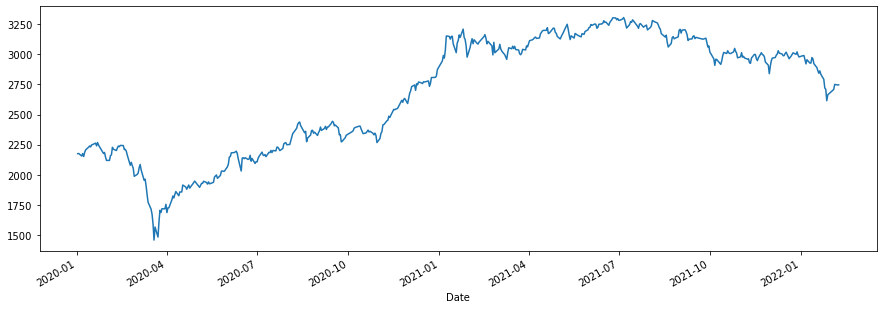

In [163]:
df = fdr.DataReader('ks11', '2020-01-01','2022-02-08')
df.Close.plot(figsize=(15,5))